# Merging Catchments

**Author:** Alexander Michels

This notebook merges together travel-time catchments calculated using parallel SLURM jobs generated from the SPASTC algorithm.

## Table of Contents

* [Illinois](#il)
* [Midwest U.S.](#mw)
* [Conterminous U.S.](#cont)

In [1]:
import geopandas as gpd
import glob
import json
import pandas as pd
import os
import sys

/tmp/ipykernel_2961/2789491156.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


<br id="il" />

## Illinois

When the SPASTC algorithm spawns parallel jobs, those jobs write out catchments for their own regions. To use these catchments, we want to merge them all together. This can easily be done! First, we grab all of the files using the "glob" package:

In [2]:
catchment_files = {}
catchment_path = "../data/regions/Illinois/catchments"
dists = ["600","1200", "1800"]
file_pattern = "resource_catchments_{}distance.geojson"

Use glob to identify all of the files (because we are not going to copy/paste that many files...)

In [3]:
for dist in dists:
    # fill in the file pattern with the current dist:
    dist_file_pattern = file_pattern.format(dist)
    catchment_files[dist] = glob.glob(os.path.join(catchment_path, f"*/{dist_file_pattern}"))
catchment_files

{'600': ['../data/regions/Illinois/catchments/0001261364/resource_catchments_600distance.geojson',
  '../data/regions/Illinois/catchments/0012460115/resource_catchments_600distance.geojson',
  '../data/regions/Illinois/catchments/0100962263/resource_catchments_600distance.geojson',
  '../data/regions/Illinois/catchments/0003561108/resource_catchments_600distance.geojson',
  '../data/regions/Illinois/catchments/0001360504/resource_catchments_600distance.geojson',
  '../data/regions/Illinois/catchments/0005060450/resource_catchments_600distance.geojson',
  '../data/regions/Illinois/catchments/0007961701/resource_catchments_600distance.geojson'],
 '1200': ['../data/regions/Illinois/catchments/0001261364/resource_catchments_1200distance.geojson',
  '../data/regions/Illinois/catchments/0012460115/resource_catchments_1200distance.geojson',
  '../data/regions/Illinois/catchments/0100962263/resource_catchments_1200distance.geojson',
  '../data/regions/Illinois/catchments/0003561108/resource_ca

Load all of the GeoDataFrames:

In [4]:
unmerged_catchments = {}
for dist in dists:
    unmerged_catchments[dist] = []
    to_load = catchment_files[dist]
    for file_to_load in to_load:
        my_gdf = gpd.read_file(file_to_load)
        # uncomment these to get LOTS of plots:
#         my_gdf.plot()
#         plt.show()
        unmerged_catchments[dist].append(my_gdf)

We can use the Pandas concat function to glue them all together:

In [5]:
catchments = []
for dist in dists:
    catchments.append(gpd.GeoDataFrame(pd.concat(unmerged_catchments[dist])))

Let's check out the result:

<Axes: >

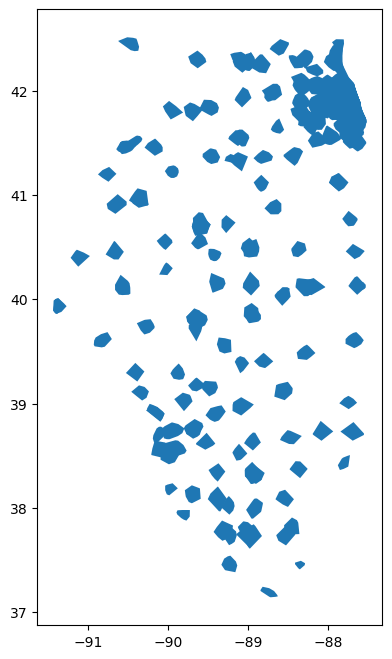

In [6]:
catchments[0].plot(figsize=(12,8))

<Axes: >

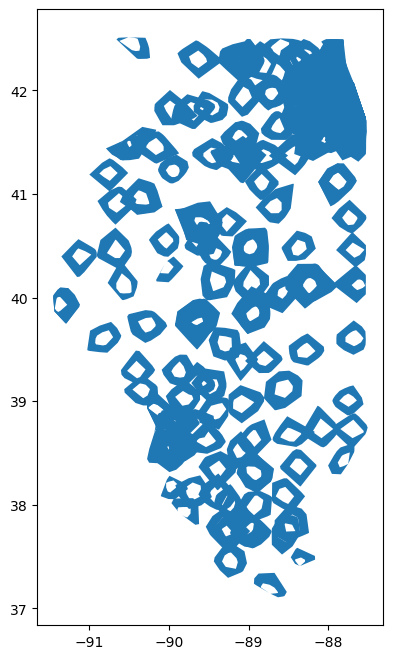

In [7]:
catchments[1].plot(figsize=(12,8))

<Axes: >

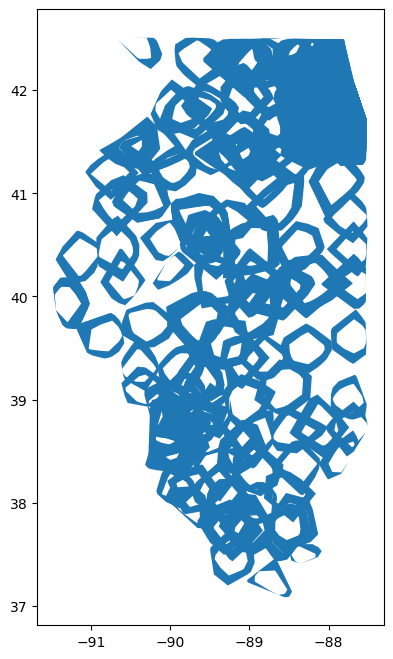

In [8]:
catchments[2].plot(figsize=(12,8))

Lastly, save the data into convenient files:

In [9]:
for i, dist in enumerate([600, 1200, 1800]):
    x = catchments[i].to_crs("EPSG:4326")
    x.to_file(os.path.join("../data/regions/Illinois", f"resource_catchments_{dist}distance.geojson"))

<br id="mw" />

## Midwest U.S.

When the SPASTC algorithm spawns parallel jobs, those jobs write out catchments for their own regions. To use these catchments, we want to merge them all together. This can easily be done! First, we grab all of the files using the "glob" package:

In [10]:
catchment_files = {}
catchment_path = "../data/regions/Midwest/catchments"
dists = ["600","1200", "1800"]
file_pattern = "resource_catchments_{}distance.geojson"

Use glob to identify all of the files (because we are not going to copy/paste that many files...)

In [11]:
for dist in dists:
    # fill in the file pattern with the current dist:
    dist_file_pattern = file_pattern.format(dist)
    catchment_files[dist] = glob.glob(os.path.join(catchment_path, f"*/{dist_file_pattern}"))
catchment_files

{'600': ['../data/regions/Midwest/catchments/0005555066/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0007844857/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0014453188/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0006540359/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0004863090/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0010446750/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0009960048/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0001460123/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0004965041/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0005255371/resource_catchments_600distance.geojson',
  '../data/regions/Midwest/catchments/0001261364/resource_catchments_600distance.ge

Load all of the GeoDataFrames:

In [12]:
unmerged_catchments = {}
for dist in dists:
    unmerged_catchments[dist] = []
    to_load = catchment_files[dist]
    for file_to_load in to_load:
        my_gdf = gpd.read_file(file_to_load)
        # uncomment these to get LOTS of plots:
#         my_gdf.plot()
#         plt.show()
        unmerged_catchments[dist].append(my_gdf)

We can use the Pandas concat function to glue them all together:

In [13]:
catchments = []
for dist in dists:
    catchments.append(gpd.GeoDataFrame(pd.concat(unmerged_catchments[dist])))

Let's check out the result:

<Axes: >

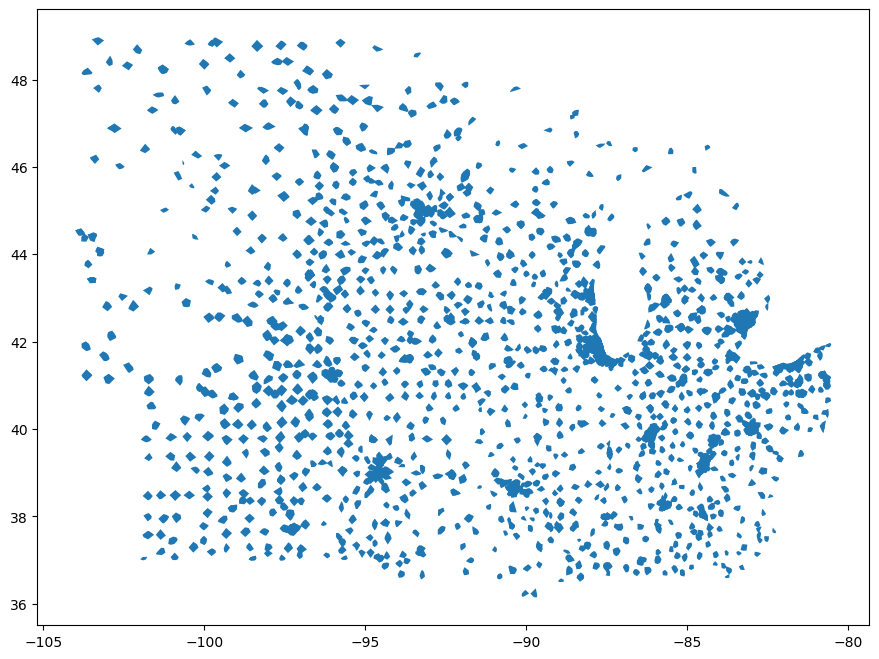

In [14]:
catchments[0].plot(figsize=(12,8))

<Axes: >

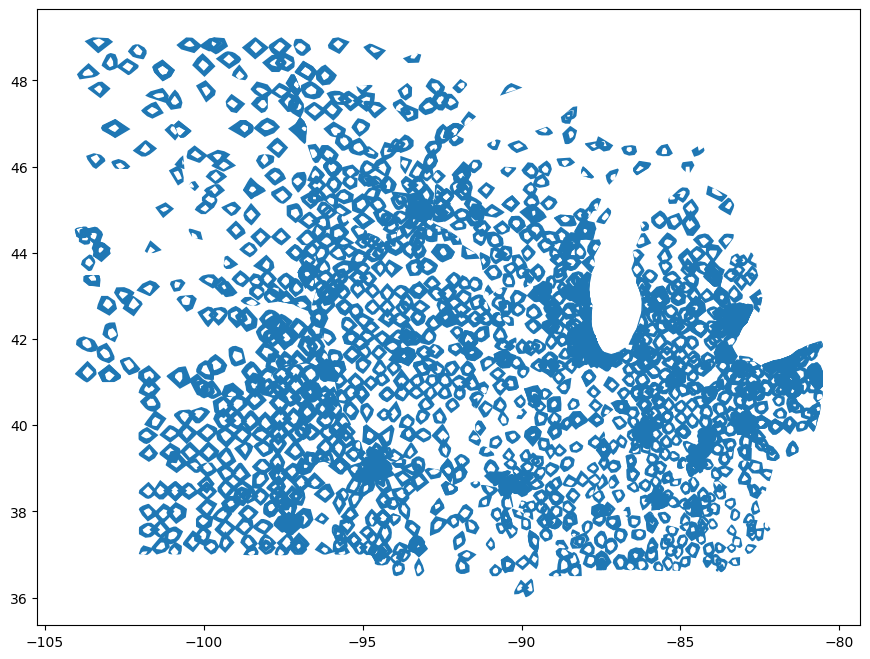

In [15]:
catchments[1].plot(figsize=(12,8))

<Axes: >

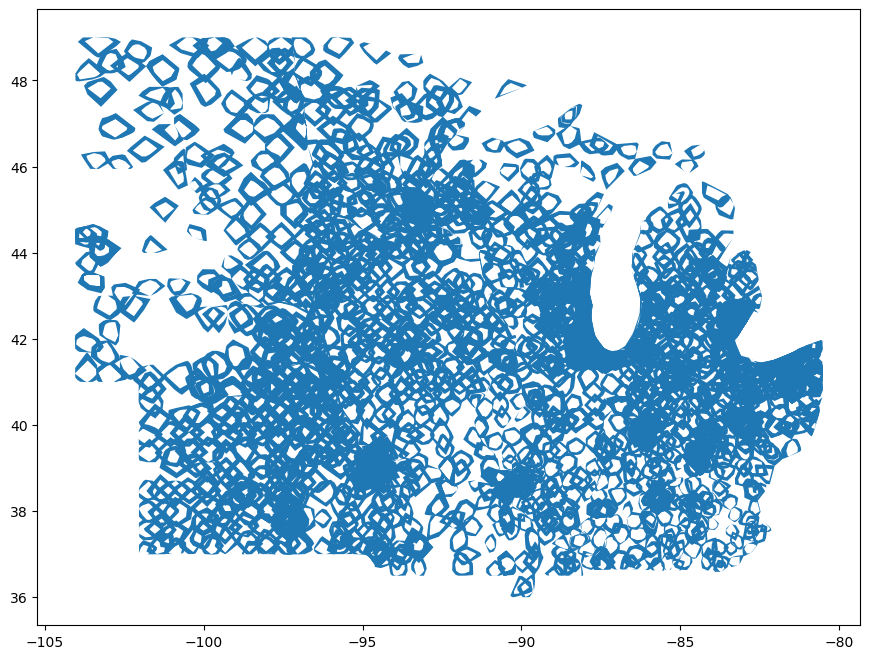

In [16]:
catchments[2].plot(figsize=(12,8))

Lastly, save the data into convenient files:

In [17]:
for i, dist in enumerate([600, 1200, 1800]):
    x = catchments[i].to_crs("EPSG:4326")
    x.to_file(os.path.join("../data/regions/Midwest", f"resource_catchments_{dist}distance.geojson"))

<br id="cont" />

## Conterminous U.S.

When the SPASTC algorithm spawns parallel jobs, those jobs write out catchments for their own regions. To use these catchments, we want to merge them all together. This can easily be done! First, we grab all of the files using the "glob" package:

In [18]:
catchment_files = {}
catchment_path = "../data/regions/Conterminous/catchments"
dists = ["600","1200", "1800"]
file_pattern = "resource_catchments_{}distance.geojson"

Use glob to identify all of the files (because we are not going to copy/paste that many files...)

In [19]:
for dist in dists:
    # fill in the file pattern with the current dist:
    dist_file_pattern = file_pattern.format(dist)
    catchment_files[dist] = glob.glob(os.path.join(catchment_path, f"*/{dist_file_pattern}"))
catchment_files

{'600': ['../data/regions/Conterminous/catchments/0003906250/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0007327565/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0039595231/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0016738019/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0003435150/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0009436507/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0108408096/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0006540359/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0025133029/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/catchments/0006728379/resource_catchments_600distance.geojson',
  '../data/regions/Conterminous/c

Load all of the GeoDataFrames:

In [20]:
unmerged_catchments = {}
for dist in dists:
    unmerged_catchments[dist] = []
    to_load = catchment_files[dist]
    for file_to_load in to_load:
        my_gdf = gpd.read_file(file_to_load)
        # uncomment these to get LOTS of plots:
#         my_gdf.plot()
#         plt.show()
        unmerged_catchments[dist].append(my_gdf)

We can use the Pandas concat function to glue them all together:

In [21]:
catchments = []
for dist in dists:
    catchments.append(gpd.GeoDataFrame(pd.concat(unmerged_catchments[dist])))

Let's check out the result:

<Axes: >

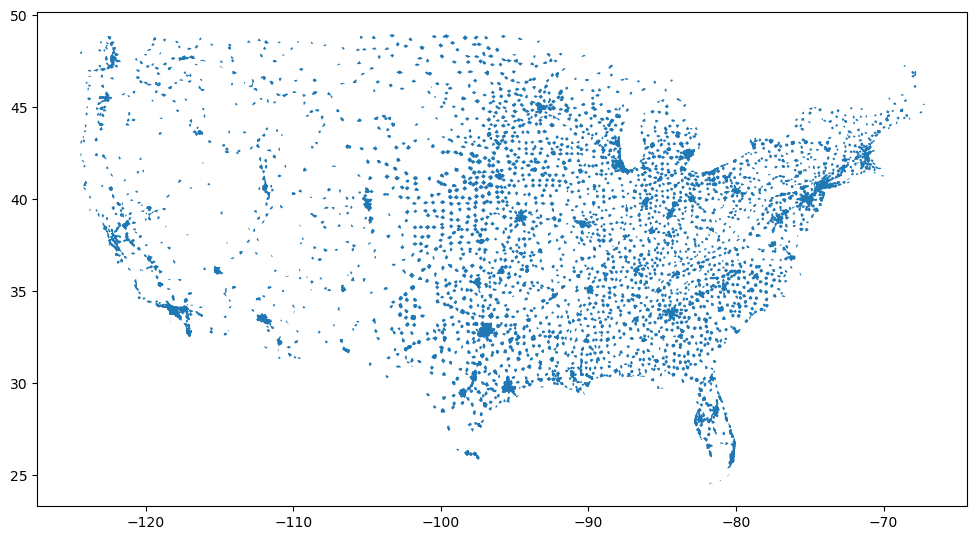

In [22]:
catchments[0].plot(figsize=(12,8))

<Axes: >

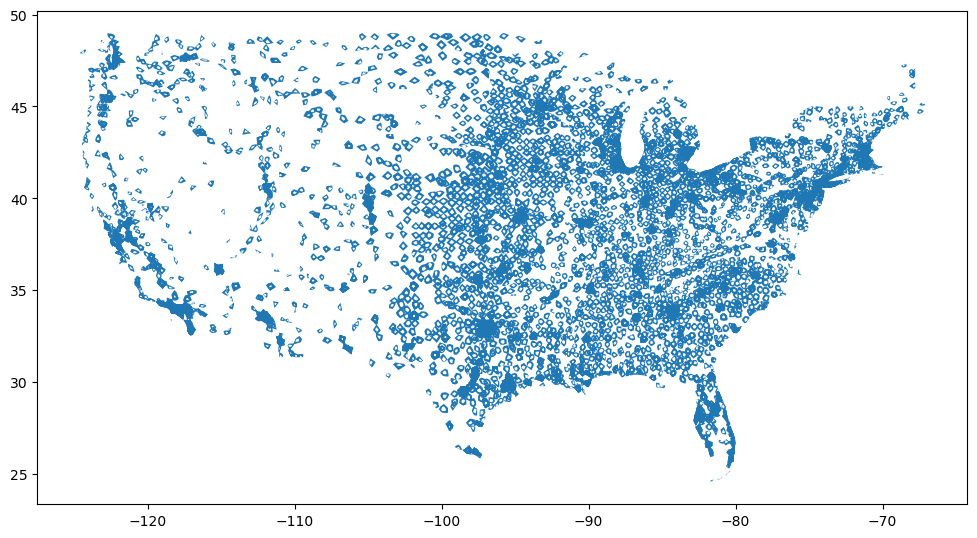

In [23]:
catchments[1].plot(figsize=(12,8))

<Axes: >

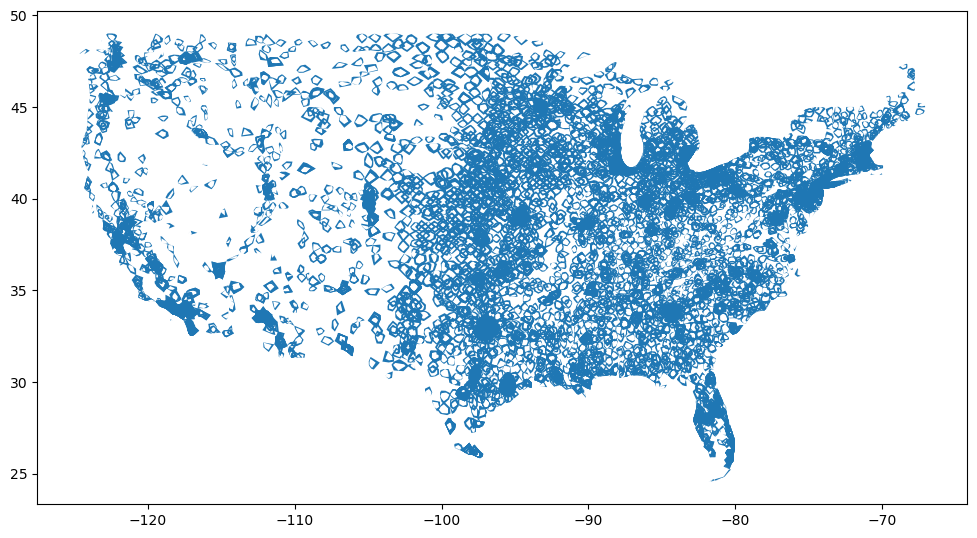

In [24]:
catchments[2].plot(figsize=(12,8))

Lastly, save the data into convenient files:

In [25]:
for i, dist in enumerate([600, 1200, 1800]):
    x = catchments[i].to_crs("EPSG:4326")
    x.to_file(os.path.join("../data/regions/Conterminous", f"resource_catchments_{dist}distance.geojson"))